## Superstore Sales 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import time
#import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.sample(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4721,4722,CA-2015-106229,07/06/2015,11/06/2015,Second Class,NR-18550,Nick Radford,Consumer,United States,Aurora,Illinois,60505.0,Central,FUR-TA-10002041,Furniture,Tables,"Bevis Round Conference Table Top, X-Base",268.935
1777,1778,CA-2016-105347,24/11/2016,28/11/2016,Standard Class,DP-13000,Darren Powers,Consumer,United States,Los Angeles,California,90004.0,West,OFF-PA-10000675,Office Supplies,Paper,Xerox 1919,368.910
619,620,CA-2018-117947,18/08/2018,23/08/2018,Second Class,NG-18355,Nat Gilpin,Corporate,United States,New York City,New York,10011.0,East,TEC-PH-10002538,Technology,Phones,Grandstream GXP1160 VoIP phone,37.910
6372,6373,CA-2018-143035,03/10/2018,05/10/2018,Second Class,CC-12430,Chuck Clark,Home Office,United States,New York City,New York,10009.0,East,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",6.630


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [25]:
#df['Postal Code'] = df['Postal Code'].apply(int)

In [8]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [13]:
df[df['Postal Code'].isnull()]

In [11]:
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [14]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [15]:
##Types of Segments and their Sales

seg_types = pd.DataFrame(df['Segment'].value_counts())

In [43]:
seg_types

,Segment
Consumer,5101
Corporate,2953
Home Office,1746


<AxesSubplot:ylabel='Segment'>

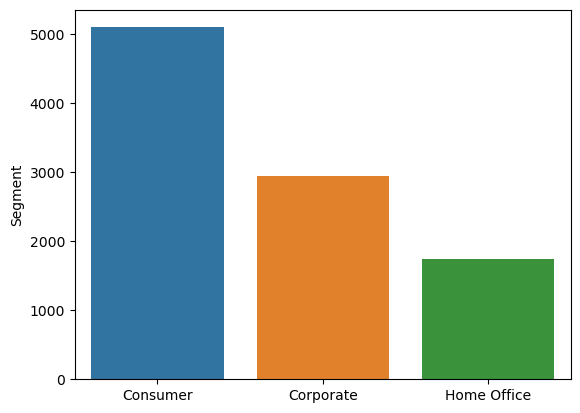

In [16]:
sns.barplot(data=seg_types , x = seg_types.index , y = 'Segment')

### Top 10 States with max sales

<AxesSubplot:xlabel='State'>

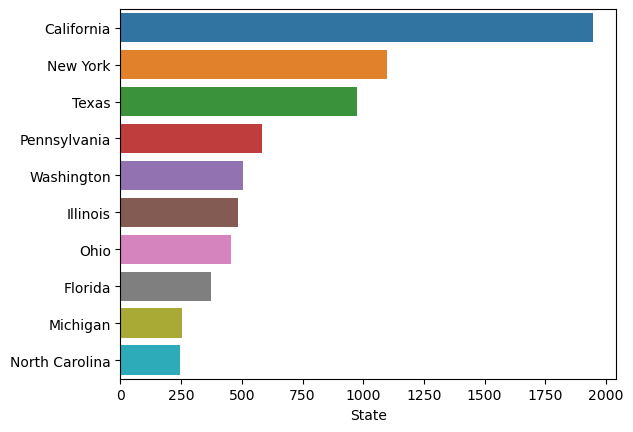

In [19]:
state_sale = pd.DataFrame(df['State'].value_counts())[0:10]
sns.barplot(data=state_sale , x = 'State', y= state_sale.index)

In [22]:
states = pd.DataFrame(df['State'].unique())
states.count() # no. of states

0    49
dtype: int64

## Region Sales 

<AxesSubplot:ylabel='Region'>

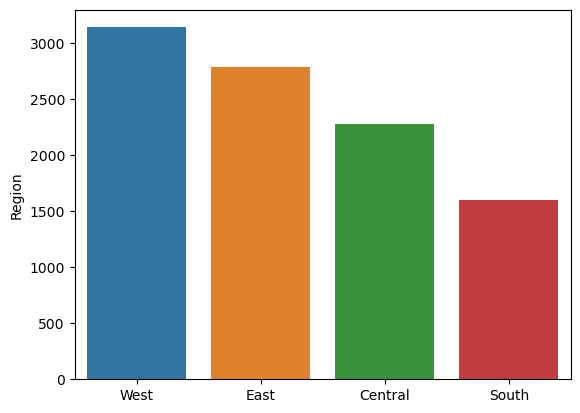

In [18]:
region_sale = pd.DataFrame(df['Region'].value_counts())
sns.barplot(data=region_sale , y = 'Region', x= region_sale.index)

## Top 10 Cities with max Sales 

<AxesSubplot:xlabel='City'>

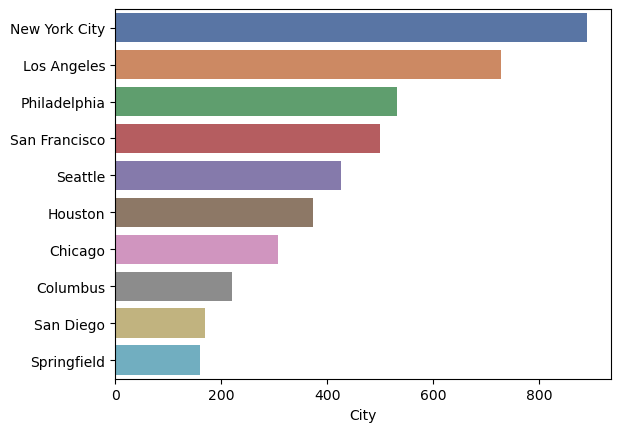

In [23]:
city_sales = pd.DataFrame(df['City'].value_counts())[0:10]
sns.barplot(data=city_sales , x= 'City', y= city_sales.index,palette = 'deep')

In [28]:
x=df['City'].unique().shape
x

(529,)

In [36]:
#df = df.drop(['Row ID','Customer ID','Order ID','Customer Name'],axis=1)
#df


In [37]:
df[df.duplicated()]

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,2015-04-23,2015-04-27,Standard Class,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [38]:
df.drop_duplicates()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-12-06,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-11-10,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-11-10,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,2016-12-01,2016-01-17,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,2016-12-01,2016-01-17,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,2016-12-01,2016-01-17,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [39]:
top_cities = df.groupby('City').sum().sort_values('Sales',ascending=False).head()
top_cities['Sales'] = top_cities['Sales'].round(2)
top_cities = top_cities.reset_index()
top_cities

,City,Postal Code,Sales
0,New York City,8928358.0,252462.55
1,Los Angeles,65542378.0,173420.18
2,Seattle,41793552.0,116106.32
3,San Francisco,47057201.0,109041.12
4,Philadelphia,10179682.0,108841.75


In [40]:
fig = px.bar(top_cities,x='City',y='Sales',title='Top 15 Cities w.r.t Sales')
fig.show()

In [41]:
top_states = df.groupby('State').sum().sort_values('Sales',ascending=False).head(10)
top_states['Sales'] = top_states['Sales'].round(2)
top_states = top_states.reset_index()
top_states

,State,Postal Code,Sales
0,California,179328411.0,446306.46
1,New York,11511840.0,306361.15
2,Texas,74825178.0,168572.53
3,Washington,49465481.0,135206.85
4,Pennsylvania,11094945.0,116276.65
5,Florida,12304453.0,88436.53
6,Illinois,29322411.0,79236.52
7,Michigan,12257093.0,76136.07
8,Ohio,19910187.0,75130.35
9,Virginia,5124335.0,70636.72


In [42]:
fig = px.bar(top_states,x='State',y='Sales',title='Top 15 States w.r.t Sales',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [43]:
fig = px.pie(df,names='Ship Mode',title='Ship Mode',values=np.ones(df.shape[0]),
             color_discrete_sequence=px.colors.sequential.matter) #RdBu,Rainbow,Viridis,Reds,Emrld,Burg_r,YlGnBu_r
fig.show()

In [44]:
fig = px.pie(df,names='Segment',title='Segment',values=np.ones(df.shape[0])
             ,color_discrete_sequence=px.colors.sequential.Burg_r)#OrRd,Aggrnyl,Sunset,deep
fig.show()


In [45]:
fig = px.pie(df,names='Category',title='Category',values=np.ones(df.shape[0])
             ,color_discrete_sequence=px.colors.sequential.Emrld)
fig.show()

In [46]:
top_sales_category = df.groupby('Category').sum()['Sales'].reset_index()

fig = px.pie(top_sales_category,names='Category',values='Sales'
             ,title='Category w.r.t Sales',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [47]:
fig = px.pie(df,names='Sub-Category',values=np.ones(df.shape[0]),
            title='Sub-Category',color_discrete_sequence=px.colors.sequential.turbid)
fig.show() 

In [48]:
top_sales_region = df.groupby('Region').sum().reset_index()

fig = px.pie(top_sales_region,names='Region',values='Sales'
             ,title='Region w.r.t Sales',color_discrete_sequence=px.colors.sequential.Burgyl)
fig.show()

In [49]:
top_sales_segment = df.groupby('Segment').sum().reset_index()


fig = px.pie(top_sales_segment,names='Segment',values='Sales'
             ,title='Segment w.r.t Sales',color_discrete_sequence=px.colors.sequential.thermal)
fig.show()

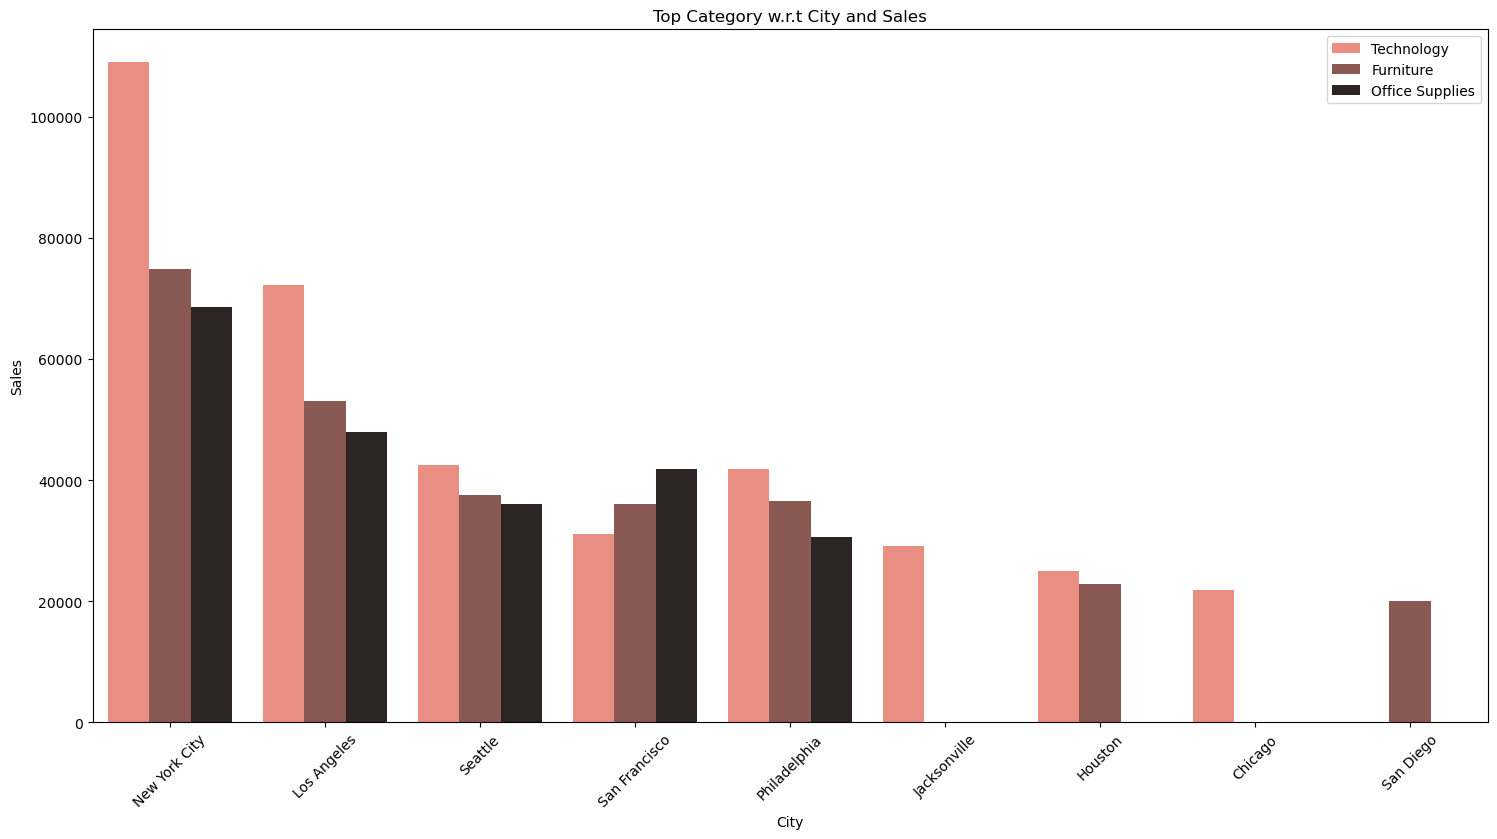

In [54]:
plt.figure(figsize=(18,9))

top_cities = df.groupby(['Category','City']).sum().sort_values('Sales',ascending=False).head(20)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)

sns.barplot(x='City',y='Sales',hue='Category',data=top_cities,palette='dark:salmon_r')
plt.title("Top Category w.r.t City and Sales")
plt.legend(loc='upper right')
plt.xticks(rotation='45')
plt.show()

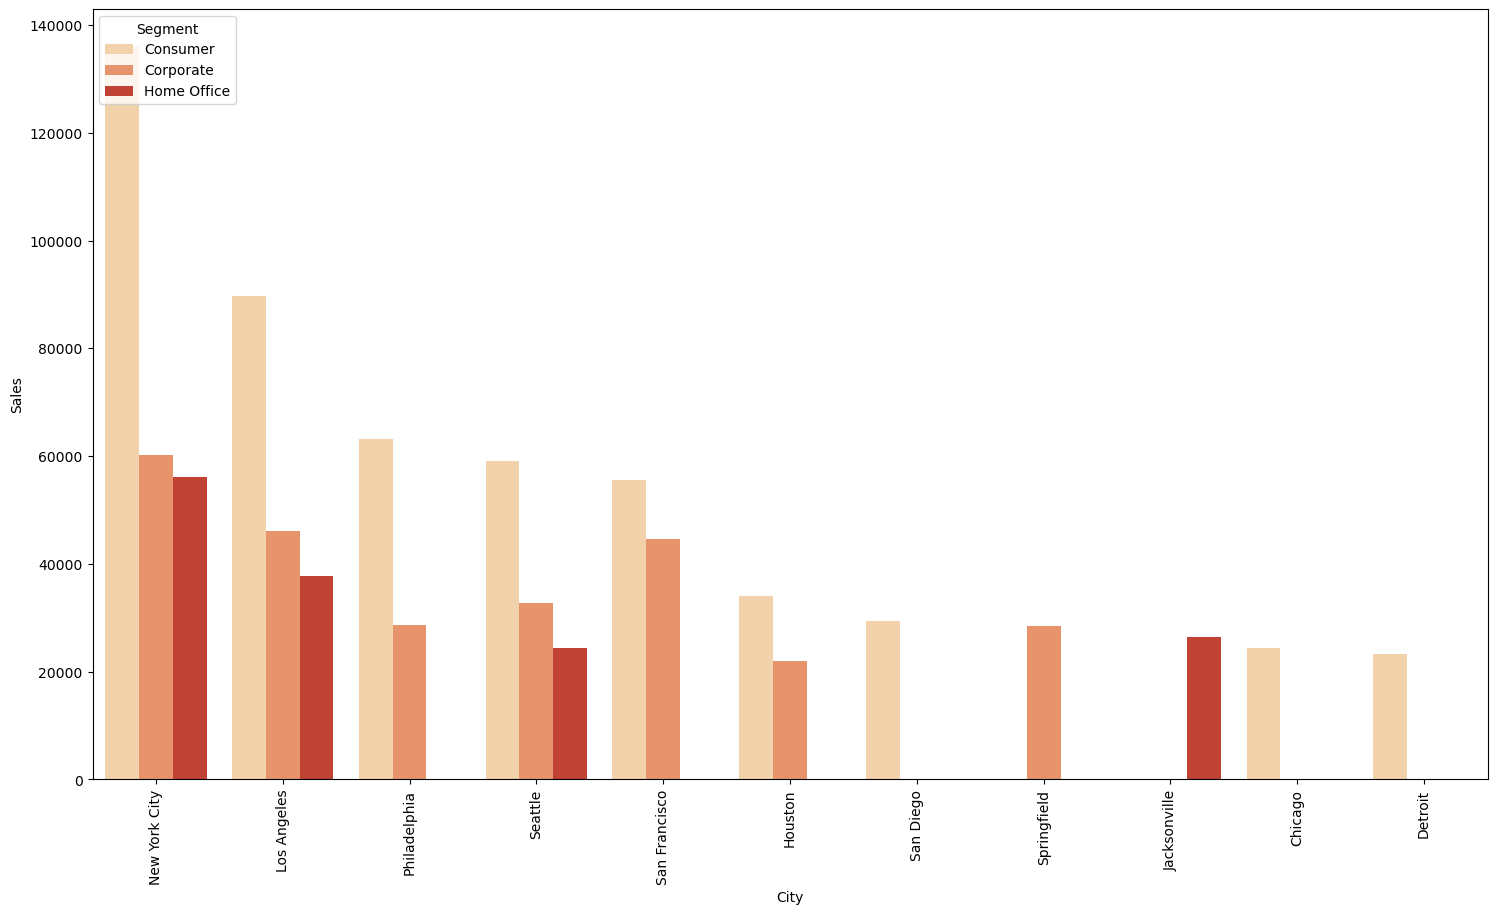

In [53]:
plt.figure(figsize=(18,10))

top_cities= df.groupby(["City","Segment"]).sum().sort_values("Sales",ascending=False).head(20)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)

sns.barplot(x='City',y='Sales',hue='Segment',data=top_cities,palette='OrRd')
plt.xticks(rotation='vertical')
plt.show()